In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
import seaborn as sb

import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices, dmatrix, demo_data

In [7]:
#IMPORT DATA
df=pd.read_excel('Stroke.xlsx')
#REPLACE Y/N WITH 1/0
df['Smoker'] = df['Smoker'].replace({'Yes':1,'No':0})

# EXTRACT INTO NUMPY ARRAYS
y = df['Risk'].values
x_age = df['Age'].values
x_sstatus = df['Smoker'].values
x_bloodpressure = df['BloodPressure'].values

#Reshape NumpyArrays to fit LinReg
y = y.reshape(1,-1)
x_age = x_age.reshape(1,-1)
x_bloodpressure = x_bloodpressure.reshape(1,-1)
x_sstatus = x_sstatus.reshape(1,-1)

df.head()

,Risk,Age,BloodPressure,Smoker
0,12,57,152,0
1,24,67,163,0
2,13,58,155,0
3,56,86,177,1
4,28,59,196,0


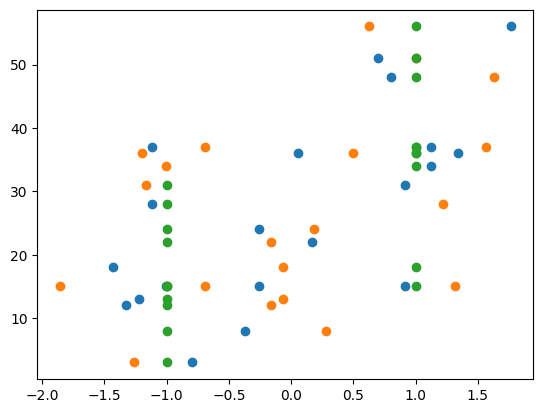

In [26]:
#create basic scatterplot
plt.plot(x, y,'o')
plt.show()

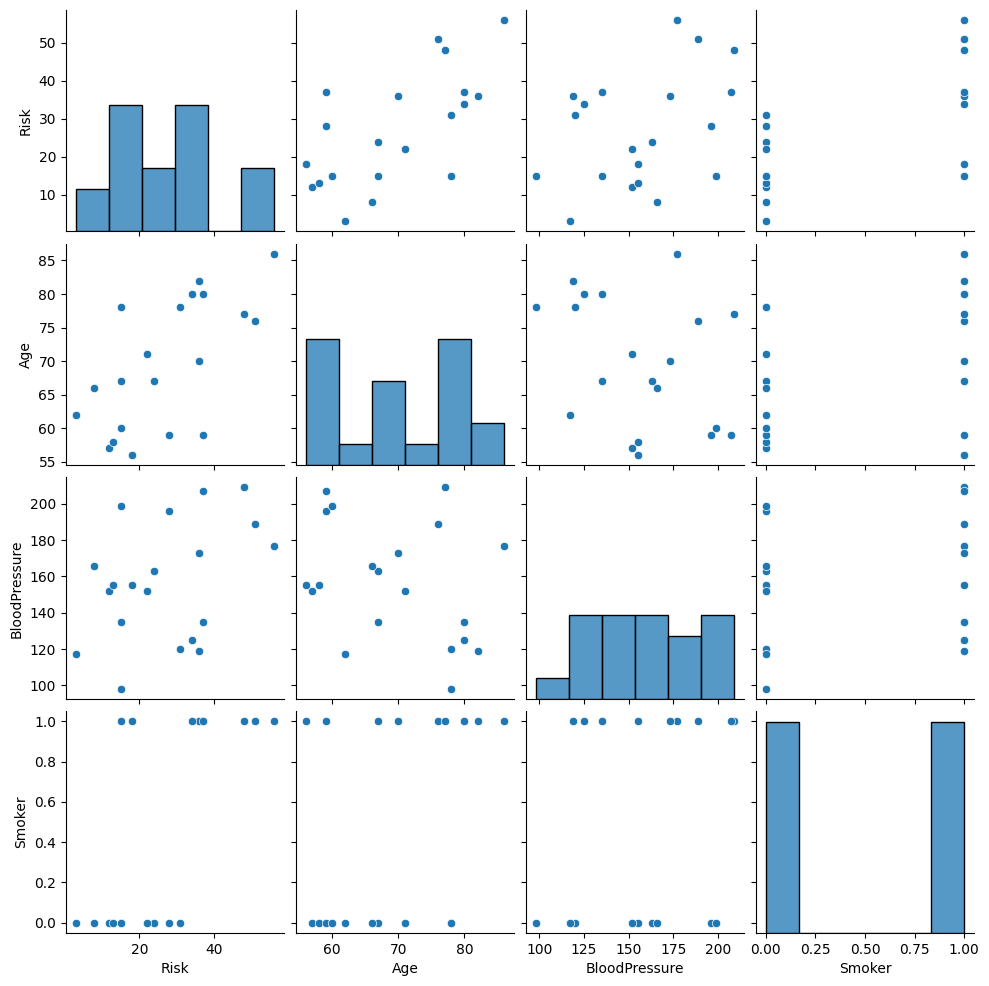

In [28]:
sb.pairplot(df)


In [10]:
stroke_data = df[['Age','BloodPressure','Smoker']].values
stroke_target = df[['Risk']].values
stroke_data_names = ['Age','BloodPressure','Smoker']
x,y = scale(stroke_data),stroke_target

In [24]:
#call linear Regression
LinReg = LinearRegression()
LinReg.fit(x,y)
print(LinReg.score(x,y))
print(LinReg.intercept_)
print(LinReg.coef_)

0.8734868200235467
[26.95]
[[10.0919706   8.0086582   4.36993553]]


In [9]:
print(df.corr())

                   Risk       Age  BloodPressure    Smoker
Risk           1.000000  0.650240       0.388163  0.680448
Age            0.650240  1.000000      -0.308952  0.410767
BloodPressure  0.388163 -0.308952       1.000000  0.166646
Smoker         0.680448  0.410767       0.166646  1.000000




```
What is the score of your regression model?

0.873

What is the y-intercept, and what is the coefficient for each of the three predictor variables?

Y-Int = 26.95  

coefficient(s):
age=10.0919706   
bloodpressure=8.0086582   
smoker=4.36993553

Are all three of the predictor variables significant? Use 5% as a cutoff. Why or why not?

individually the only significant variables are age and bloodpressure.
but also, blood pressure has signficant outliers

Would your answer to #4 change if you were to use 1% as a cutoff?

yes, because its changes the likelyhood of chance for
each variable. changing the percentage of view also
changes the percentage of accuracy and reliablitiy.
```

